# Libraries

In [77]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate as cross_val_score
from sklearn.naive_bayes import GaussianNB 

# Datasets

In [78]:
train_data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names=['Age','Workclass','Finalweight','Education','Educationnumber','Martialstatus','Occupation','Relationship','Race','Gender','Capitalgain','Capitalloss','Workinghours','Country','Status'])
test_data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',names=['Age','Workclass','Finalweight','Education','Educationnumber','Martialstatus','Occupation','Relationship','Race','Gender','Capitalgain','Capitalloss','Workinghours','Country','Status'])


In [79]:
train_data.head()

,Age,Workclass,Finalweight,Education,Educationnumber,Martialstatus,Occupation,Relationship,Race,Gender,Capitalgain,Capitalloss,Workinghours,Country,Status
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [80]:
test_data.drop(0,inplace=True)
test_data.head()

,Age,Workclass,Finalweight,Education,Educationnumber,Martialstatus,Occupation,Relationship,Race,Gender,Capitalgain,Capitalloss,Workinghours,Country,Status
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


# Discription of Datasets

In [81]:
train_data.describe(include='all')

,Age,Workclass,Finalweight,Education,Educationnumber,Martialstatus,Occupation,Relationship,Race,Gender,Capitalgain,Capitalloss,Workinghours,Country,Status
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [82]:
test_data.describe(include='all')

,Age,Workclass,Finalweight,Education,Educationnumber,Martialstatus,Occupation,Relationship,Race,Gender,Capitalgain,Capitalloss,Workinghours,Country,Status
count,16281,16281,1.628100e+04,16281,16281.000000,16281,16281,16281,16281,16281,16281.000000,16281.000000,16281.000000,16281,16281
unique,73,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,2
top,35,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K.
freq,461,11210,NaN,5283,NaN,7403,2032,6523,13946,10860,NaN,NaN,NaN,14662,12435
mean,NaN,NaN,1.894357e+05,NaN,10.072907,NaN,NaN,NaN,NaN,NaN,1081.905104,87.899269,40.392236,NaN,NaN
std,NaN,NaN,1.057149e+05,NaN,2.567545,NaN,NaN,NaN,NaN,NaN,7583.935968,403.105286,12.479332,NaN,NaN
min,NaN,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,1.167360e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,NaN,NaN,1.778310e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,NaN,NaN,2.383840e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Handling Null values

In [83]:
train_data.isna().sum()

Age                0
Workclass          0
Finalweight        0
Education          0
Educationnumber    0
Martialstatus      0
Occupation         0
Relationship       0
Race               0
Gender             0
Capitalgain        0
Capitalloss        0
Workinghours       0
Country            0
Status             0
dtype: int64

In [84]:
test_data.isna().sum()

Age                0
Workclass          0
Finalweight        0
Education          0
Educationnumber    0
Martialstatus      0
Occupation         0
Relationship       0
Race               0
Gender             0
Capitalgain        0
Capitalloss        0
Workinghours       0
Country            0
Status             0
dtype: int64

# Data Visualisation(Categorical Data)

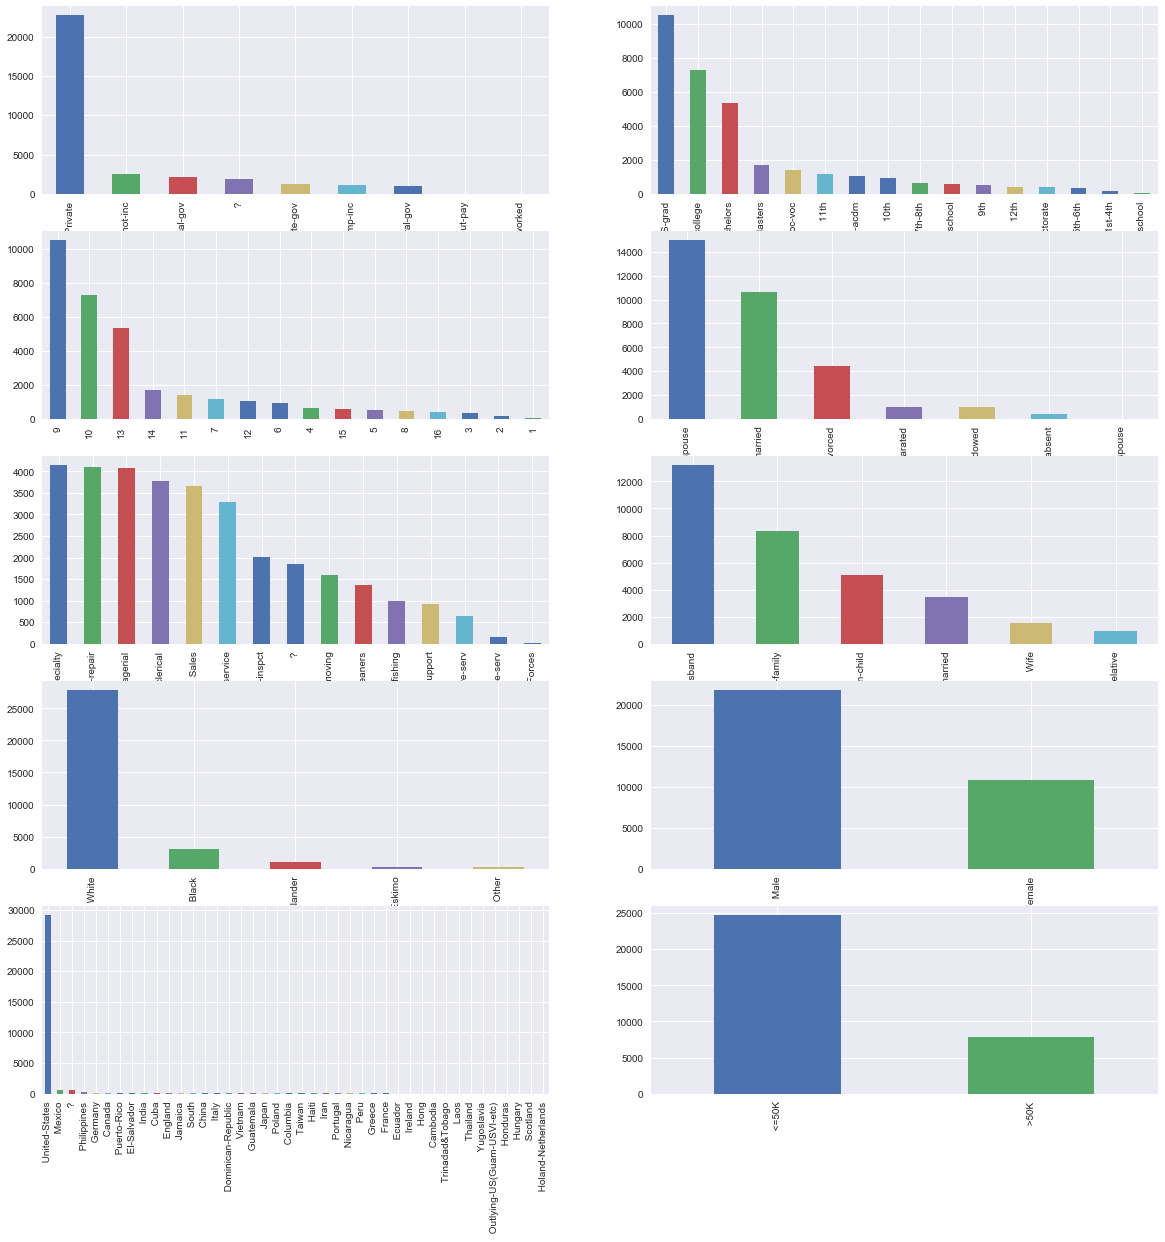

In [85]:
i=1
columns=list(['Workclass','Education','Educationnumber','Martialstatus','Occupation','Relationship','Race','Gender','Country', 'Status'])
for val in columns:
    plt.subplot(5,2,i)
    train_data[val].value_counts().plot(kind='bar',figsize=(20,20))
    plt.show
    i=i+1


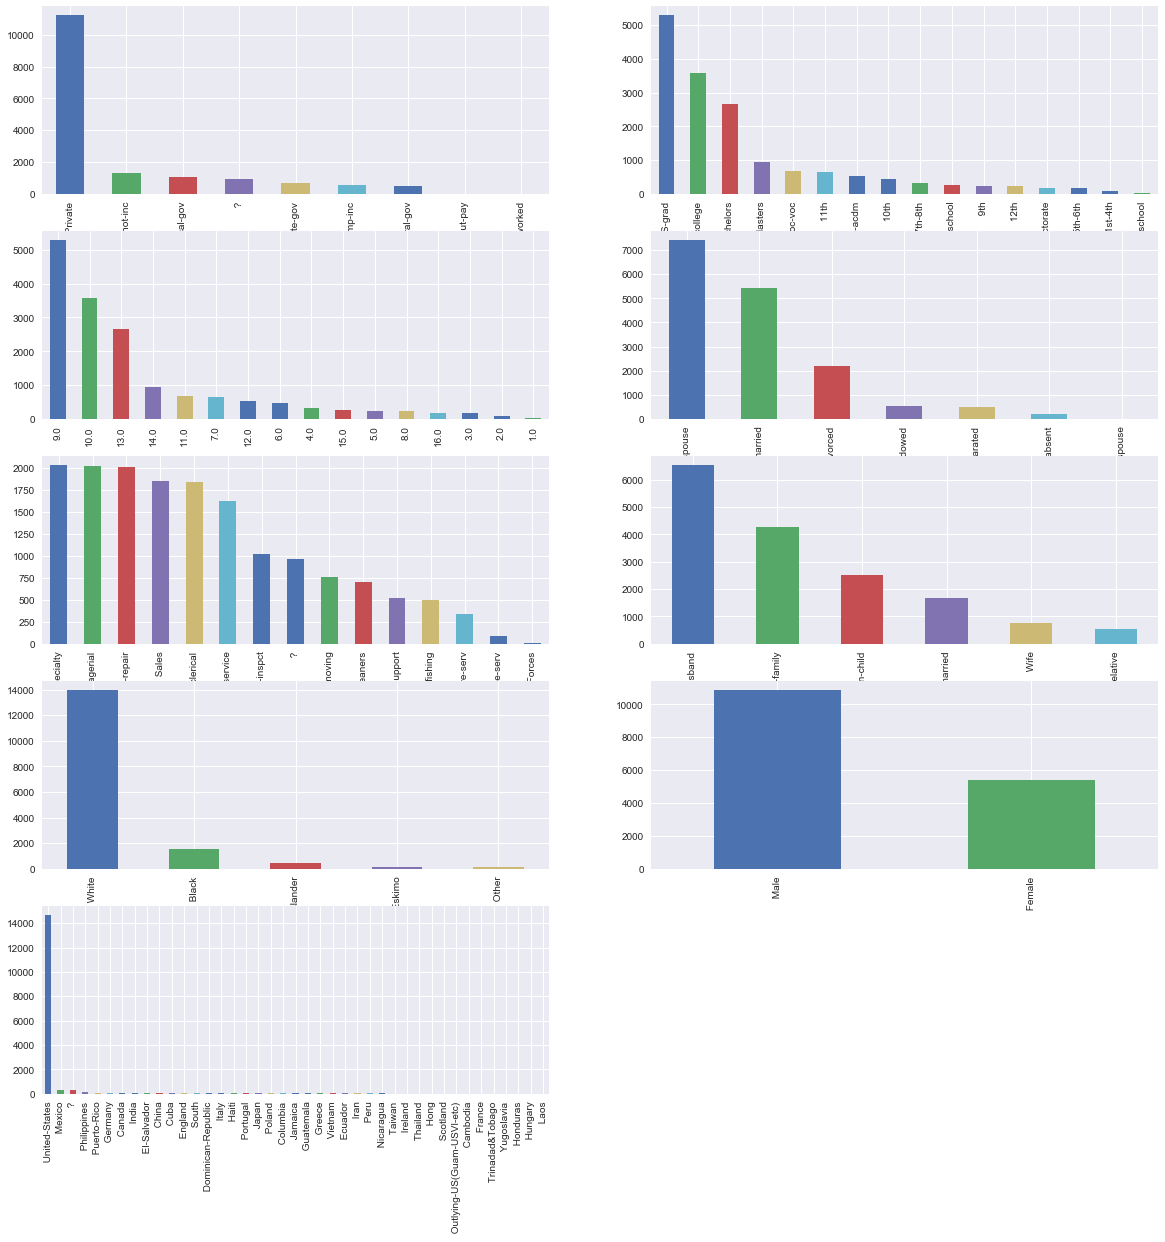

In [86]:
i=1
columns=list(['Workclass','Education','Educationnumber','Martialstatus','Occupation','Relationship','Race','Gender','Country'])
for val in columns:
    plt.subplot(5,2,i)
    test_data[val].value_counts().plot(kind='bar',figsize=(20,20))
    plt.show
    i=i+1


# Data cleaning

# Cleaning of "Workclass" column

In [87]:
train_data[train_data['Workclass']==' ?']

,Age,Workclass,Finalweight,Education,Educationnumber,Martialstatus,Occupation,Relationship,Race,Gender,Capitalgain,Capitalloss,Workinghours,Country,Status
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
149,43,?,174662,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,?,252903,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,?,38317,1st-4th,2,Divorced,?,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,?,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,<=50K


In [88]:
train_data['Workclass'].replace(' ?','Others',inplace=True)


In [89]:
test_data['Workclass'].replace(' ?','Others',inplace=True)


In [90]:
print(train_data['Workclass'].value_counts())
train_data.replace([' Local-gov',' State-gov',' Federal-gov'],'Goverment',inplace=True)
train_data.replace([' Self-emp-not-inc',' Self-emp-inc'],'Selfemployed',inplace=True)
train_data.replace([' Without-pay',' Never-worked'],'Unemployed',inplace=True)
print(train_data.Workclass.value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Others                1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 Private        22696
Goverment        4351
Selfemployed     3657
Others           1836
Unemployed         21
Name: Workclass, dtype: int64


In [91]:
print(test_data['Workclass'].value_counts())
test_data.replace([' Local-gov',' State-gov',' Federal-gov'],'Goverment',inplace=True)
test_data.replace([' Self-emp-not-inc',' Self-emp-inc'],'Selfemployed',inplace=True)
test_data.replace([' Without-pay',' Never-worked'],'Unemployed',inplace=True)
print(test_data.Workclass.value_counts())

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
Others                 963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: Workclass, dtype: int64
 Private        11210
Goverment        2198
Selfemployed     1900
Others            963
Unemployed         10
Name: Workclass, dtype: int64


# Cleaning of "Education" column

In [92]:
print(train_data['Education'].value_counts()) 
train_data['Education'].replace([' Preschool',' 1st-4th'],'Priliminary',inplace=True)
train_data['Education'].replace([' 5th-6th',' 7th-8th'],'Middleschool',inplace=True)
train_data['Education'].replace([' 9th',' 10th',' 11th',' 12th',' HS-grad',' Some-college'],'Highschool',inplace=True)
train_data['Education'].replace([' Bachelors',' Assoc-acdm',' Assoc-voc'],'UG',inplace=True)
train_data['Education'].replace([' Prof-school',' Masters'],'PG',inplace=True)
train_data['Education'].replace(' Doctorate','Phd',inplace=True)
print(train_data['Education'].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Highschool      20847
UG               7804
PG               2299
Middleschool      979
Phd               413
Priliminary       219
Name: Education, dtype: int64


In [93]:
print(test_data['Education'].value_counts()) 
test_data['Education'].replace([' Preschool',' 1st-4th'],'Priliminary',inplace=True)
test_data['Education'].replace([' 5th-6th',' 7th-8th'],'Middleschool',inplace=True)
test_data['Education'].replace([' 9th',' 10th',' 11th',' 12th',' HS-grad',' Some-college'],'Highschool',inplace=True)
test_data['Education'].replace([' Bachelors',' Assoc-acdm',' Assoc-voc'],'UG',inplace=True)
test_data['Education'].replace([' Prof-school',' Masters'],'PG',inplace=True)
test_data['Education'].replace(' Doctorate','Phd',inplace=True)
print(test_data['Education'].value_counts())

 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: Education, dtype: int64
Highschool      10429
UG               3883
PG               1192
Middleschool      485
Phd               181
Priliminary       111
Name: Education, dtype: int64


In [94]:
edu = list(train_data['Education'].unique())
for val in edu:
    print(val,'Education number:')
    print(train_data[train_data['Education'] == val].Educationnumber.value_counts())

UG Education number:
13    5355
11    1382
12    1067
Name: Educationnumber, dtype: int64
Highschool Education number:
9     10501
10     7291
7      1175
6       933
5       514
8       433
Name: Educationnumber, dtype: int64
PG Education number:
14    1723
15     576
Name: Educationnumber, dtype: int64
Middleschool Education number:
4    646
3    333
Name: Educationnumber, dtype: int64
Phd Education number:
16    413
Name: Educationnumber, dtype: int64
Priliminary Education number:
2    168
1     51
Name: Educationnumber, dtype: int64


In [95]:
edu = list(test_data['Education'].unique())
for val in edu:
    print(val,'Education number:')
    print(test_data[test_data['Education'] == val].Educationnumber.value_counts())

Highschool Education number:
9.0     5283
10.0    3587
7.0      637
6.0      456
5.0      242
8.0      224
Name: Educationnumber, dtype: int64
UG Education number:
13.0    2670
11.0     679
12.0     534
Name: Educationnumber, dtype: int64
PG Education number:
14.0    934
15.0    258
Name: Educationnumber, dtype: int64
Middleschool Education number:
4.0    309
3.0    176
Name: Educationnumber, dtype: int64
Phd Education number:
16.0    181
Name: Educationnumber, dtype: int64
Priliminary Education number:
2.0    79
1.0    32
Name: Educationnumber, dtype: int64


In [96]:
train_data.drop(['Educationnumber'], axis=1,inplace=True)
train_data.head()

,Age,Workclass,Finalweight,Education,Martialstatus,Occupation,Relationship,Race,Gender,Capitalgain,Capitalloss,Workinghours,Country,Status
0,39,Goverment,77516,UG,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Selfemployed,83311,UG,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,Highschool,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,Highschool,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,UG,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [97]:
test_data.drop(['Educationnumber'], axis=1,inplace=True)
test_data.head()

,Age,Workclass,Finalweight,Education,Martialstatus,Occupation,Relationship,Race,Gender,Capitalgain,Capitalloss,Workinghours,Country,Status
1,25,Private,226802.0,Highschool,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,Highschool,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Goverment,336951.0,UG,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Highschool,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,Others,103497.0,Highschool,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


This values clears shows that Education and Educationnumber columns are highly correlated.Grouping education number and working on it leads to high correlation of features.
So dropping that column will nullify this problem

# Cleaning of "Martial Status" column

In [98]:
print(train_data['Martialstatus'].value_counts())
train_data['Martialstatus'].replace([' Divorced',' Separated',' Widowed',' Married-spouse-absent'],'Unsuccessfulmarriage',inplace=True)
train_data['Martialstatus'].replace([' Married-civ-spouse',' Married-AF-spouse'],'Successfulmarraige',inplace=True)
train_data['Martialstatus'].replace([' Never-married'],'Never-Married',inplace=True)
print(train_data['Martialstatus'].value_counts())

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Martialstatus, dtype: int64
Successfulmarraige      14999
Never-Married           10683
Unsuccessfulmarriage     6879
Name: Martialstatus, dtype: int64


In [99]:
print(test_data['Martialstatus'].value_counts())
test_data['Martialstatus'].replace([' Divorced',' Separated',' Widowed',' Married-spouse-absent'],'Unsuccessfulmarriage',inplace=True)
test_data['Martialstatus'].replace([' Married-civ-spouse',' Married-AF-spouse'],'Successfulmarraige',inplace=True)
test_data['Martialstatus'].replace([' Never-married'],'Never-Married',inplace=True)
print(test_data['Martialstatus'].value_counts())

 Married-civ-spouse       7403
 Never-married            5434
 Divorced                 2190
 Widowed                   525
 Separated                 505
 Married-spouse-absent     210
 Married-AF-spouse          14
Name: Martialstatus, dtype: int64
Successfulmarraige      7417
Never-Married           5434
Unsuccessfulmarriage    3430
Name: Martialstatus, dtype: int64


# Cleaning of "Occupation" column

In [100]:
train_data['Occupation'].replace([' ?'],'Others',inplace=True)
print(train_data['Occupation'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Others                1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


In [101]:
test_data['Occupation'].replace([' ?'],'Others',inplace=True)
print(test_data['Occupation'].value_counts())

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
Others                 966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: Occupation, dtype: int64


# Cleaning of "Relationship" column

In [102]:
train_data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [103]:
test_data['Relationship'].value_counts()

 Husband           6523
 Not-in-family     4278
 Own-child         2513
 Unmarried         1679
 Wife               763
 Other-relative     525
Name: Relationship, dtype: int64

# Cleaning of "Gender" column

In [104]:
train_data['Gender'].value_counts()

 Male      21790
 Female    10771
Name: Gender, dtype: int64

In [105]:
test_data['Gender'].value_counts()

 Male      10860
 Female     5421
Name: Gender, dtype: int64

# Cleaning of "Race" column

In [106]:
print(train_data['Race'].value_counts())
train_data['Race'].replace([' Asian-Pac-Islander',' Amer-Indian-Eskimo',' Other'],'Other',inplace=True)
print(train_data['Race'].value_counts())

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64
 White    27816
 Black     3124
Other      1621
Name: Race, dtype: int64


In [107]:
print(test_data['Race'].value_counts())
test_data['Race'].replace([' Asian-Pac-Islander',' Amer-Indian-Eskimo',' Other'],'Other',inplace=True)
print(test_data['Race'].value_counts())

 White                 13946
 Black                  1561
 Asian-Pac-Islander      480
 Amer-Indian-Eskimo      159
 Other                   135
Name: Race, dtype: int64
 White    13946
 Black     1561
Other       774
Name: Race, dtype: int64


# Cleaning of "Country" column

In [108]:
print(train_data['Country'].value_counts())
#NorthAmerica
train_data['Country'].replace([' United-States',' Mexico',' Canada',' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Outlying-US(Guam-USVI-etc)',' Honduras'],'Northamerica',inplace=True)
#SouthAmerica
train_data['Country'].replace([' Columbia',' Peru',' Ecuador',' Trinadad&Tobago'],'Southamerica',inplace = True)
#Europe
train_data['Country'].replace([' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' France',' Ireland',' Yugoslavia',' Hungary',' Scotland',' Holand-Netherlands'],'Europe',inplace=True)
#Asia
train_data['Country'].replace([' Philippines',' India',' China',' Vietnam',' Japan',' Taiwan',' Iran',' Hong',' Cambodia',' Laos',' Thailand'],'Asia',inplace=True)
train_data['Country'].replace([' ?',' South'],'Others',inplace=True)
train_data['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Northamerica    30569
Asia              671
Others            663
Europe            521
Southamerica      137
Name: Country, dtype: int64

In [109]:
print(test_data['Country'].value_counts())
#NorthAmerica
test_data['Country'].replace([' United-States',' Mexico',' Canada',' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Outlying-US(Guam-USVI-etc)',' Honduras'],'Northamerica',inplace=True)
#SouthAmerica
test_data['Country'].replace([' Columbia',' Peru',' Ecuador',' Trinadad&Tobago'],'Southamerica',inplace = True)
#Europe
test_data['Country'].replace([' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' France',' Ireland',' Yugoslavia',' Hungary',' Scotland',' Holand-Netherlands'],'Europe',inplace=True)
#Asia
test_data['Country'].replace([' Philippines',' India',' China',' Vietnam',' Japan',' Taiwan',' Iran',' Hong',' Cambodia',' Laos',' Thailand'],'Asia',inplace=True)
test_data['Country'].replace([' ?',' South'],'Others',inplace=True)
test_data['Country'].value_counts()

 United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Portugal                         30
 Japan                            30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Peru                             15
 

Northamerica    15337
Asia              310
Others            309
Europe            259
Southamerica       66
Name: Country, dtype: int64

# Cleaning of "Salary" column

In [110]:
train_data.Status.replace(' <=50K',0,inplace=True)
train_data.Status.replace(' >50K',1,inplace=True)
train_data.head()

,Age,Workclass,Finalweight,Education,Martialstatus,Occupation,Relationship,Race,Gender,Capitalgain,Capitalloss,Workinghours,Country,Status
0,39,Goverment,77516,UG,Never-Married,Adm-clerical,Not-in-family,White,Male,2174,0,40,Northamerica,0
1,50,Selfemployed,83311,UG,Successfulmarraige,Exec-managerial,Husband,White,Male,0,0,13,Northamerica,0
2,38,Private,215646,Highschool,Unsuccessfulmarriage,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Northamerica,0
3,53,Private,234721,Highschool,Successfulmarraige,Handlers-cleaners,Husband,Black,Male,0,0,40,Northamerica,0
4,28,Private,338409,UG,Successfulmarraige,Prof-specialty,Wife,Black,Female,0,0,40,Northamerica,0


In [111]:
test_data.Status.replace(' <=50K.',0,inplace=True)
test_data.Status.replace(' >50K.',1,inplace=True)
test_data.head()

,Age,Workclass,Finalweight,Education,Martialstatus,Occupation,Relationship,Race,Gender,Capitalgain,Capitalloss,Workinghours,Country,Status
1,25,Private,226802.0,Highschool,Never-Married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,Northamerica,0
2,38,Private,89814.0,Highschool,Successfulmarraige,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,Northamerica,0
3,28,Goverment,336951.0,UG,Successfulmarraige,Protective-serv,Husband,White,Male,0.0,0.0,40.0,Northamerica,1
4,44,Private,160323.0,Highschool,Successfulmarraige,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,Northamerica,1
5,18,Others,103497.0,Highschool,Never-Married,Others,Own-child,White,Female,0.0,0.0,30.0,Northamerica,0


# Data visualisation(After cleaning and bucketing)

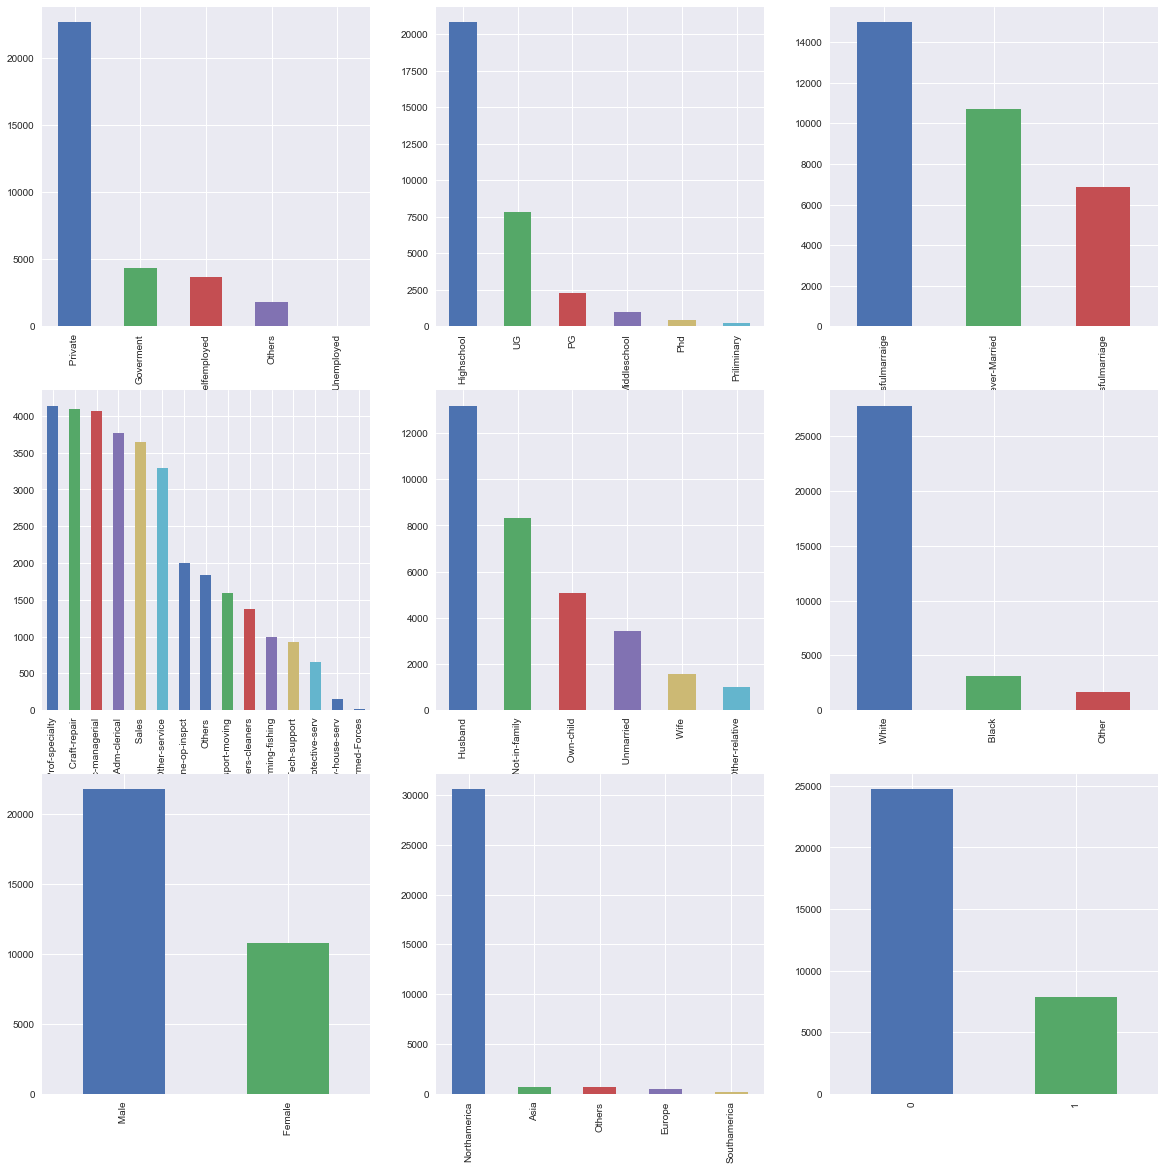

In [112]:
i=1
columns=list(['Workclass','Education','Martialstatus','Occupation','Relationship','Race','Gender','Country', 'Status'])
for val in columns:
    plt.subplot(3,3,i)
    train_data[val].value_counts().plot(kind='bar',figsize=(20,20))
    plt.show
    i=i+1


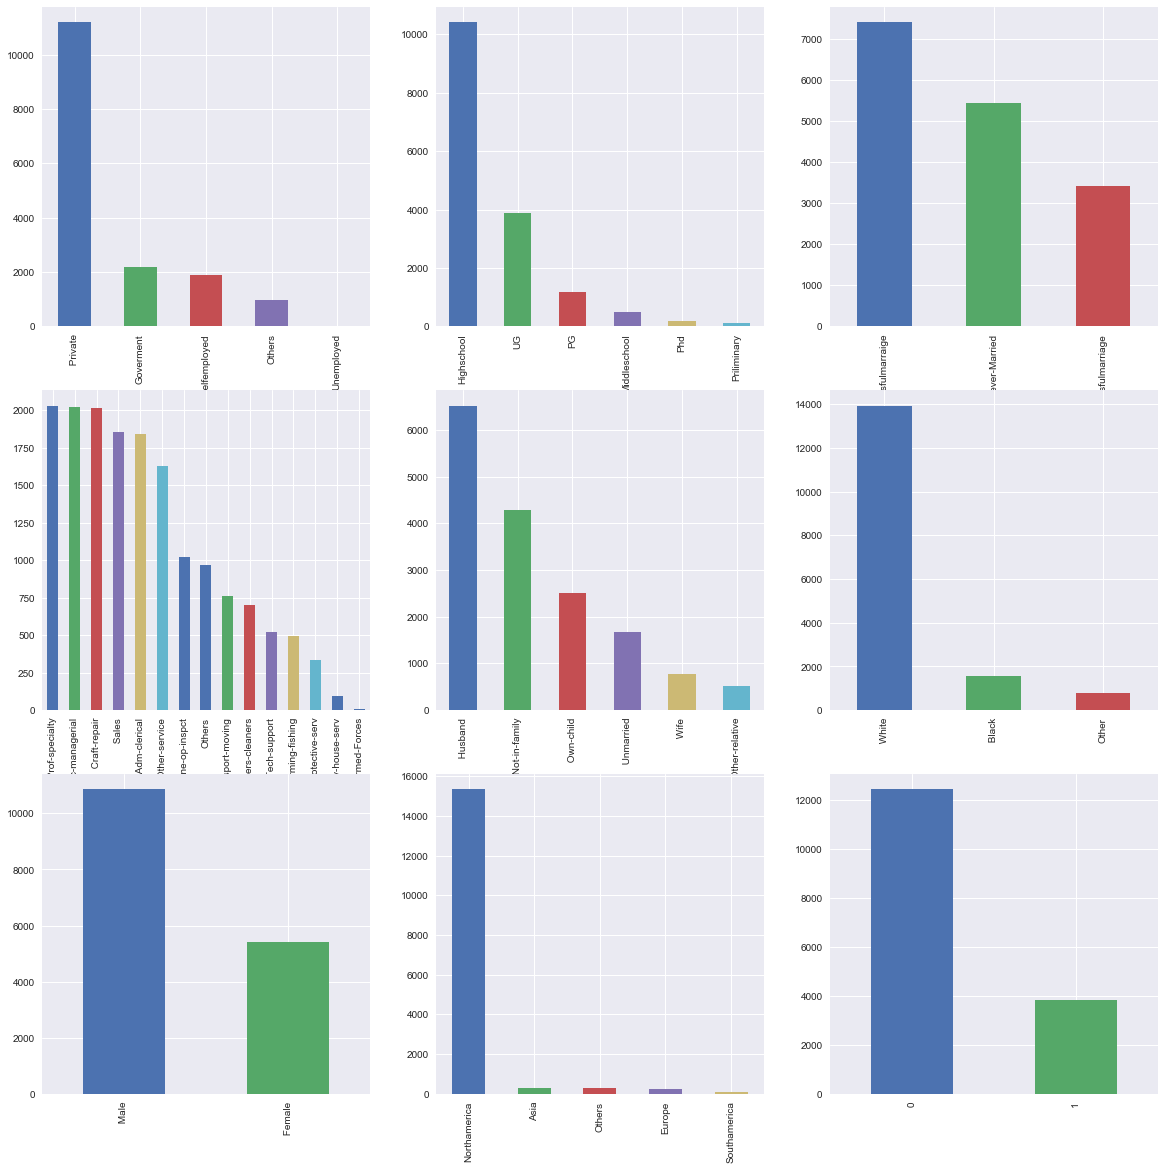

In [113]:
i=1
columns=list(['Workclass','Education','Martialstatus','Occupation','Relationship','Race','Gender','Country', 'Status'])
for val in columns:
    plt.subplot(3,3,i)
    test_data[val].value_counts().plot(kind='bar',figsize=(20,20))
    plt.show
    i=i+1

# Data Visualisation(Continuous Data)

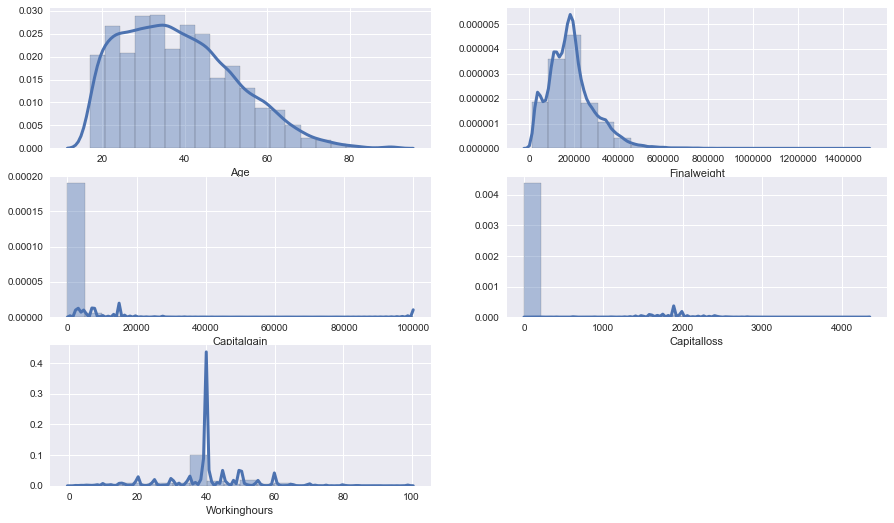

In [114]:
i=1
sb.set(rc={'figure.figsize':(15,15)})
columns=list(['Age','Finalweight','Capitalgain','Capitalloss','Workinghours'])  
for val in columns:
    plt.subplot(5,2,i)
    sb.distplot(train_data[val],hist=True,kde=True,bins=20,hist_kws={'edgecolor':'black'},kde_kws={'linewidth':3})
    i=i+1

In [115]:
test_data.head()

,Age,Workclass,Finalweight,Education,Martialstatus,Occupation,Relationship,Race,Gender,Capitalgain,Capitalloss,Workinghours,Country,Status
1,25,Private,226802.0,Highschool,Never-Married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,Northamerica,0
2,38,Private,89814.0,Highschool,Successfulmarraige,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,Northamerica,0
3,28,Goverment,336951.0,UG,Successfulmarraige,Protective-serv,Husband,White,Male,0.0,0.0,40.0,Northamerica,1
4,44,Private,160323.0,Highschool,Successfulmarraige,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,Northamerica,1
5,18,Others,103497.0,Highschool,Never-Married,Others,Own-child,White,Female,0.0,0.0,30.0,Northamerica,0


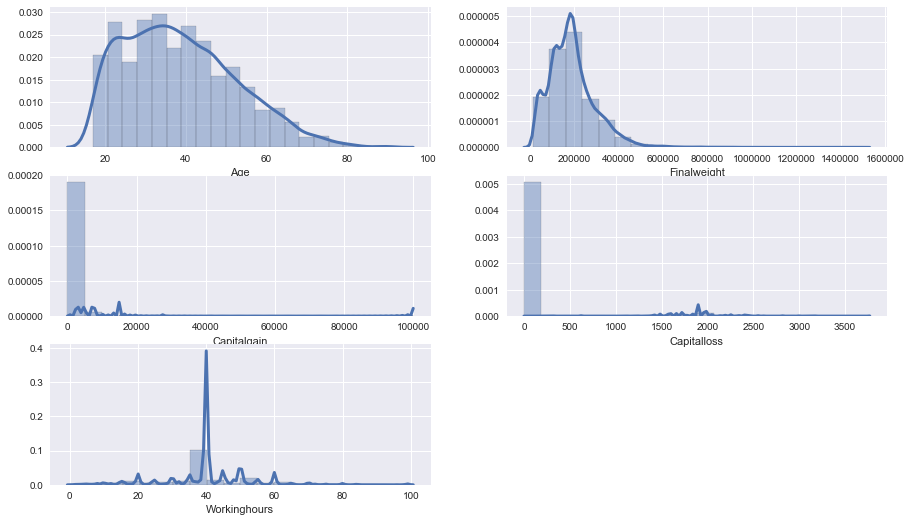

In [116]:
i=1
sb.set(rc={'figure.figsize':(15,15)})
columns=list(['Age','Finalweight','Capitalgain','Capitalloss','Workinghours'])  
test_data['Age']=test_data['Age'].apply(pd.to_numeric)
for val in columns:
    plt.subplot(5,2,i)
    sb.distplot(test_data[val],hist=True,kde=True,bins=20,hist_kws={'edgecolor':'black'},kde_kws={'linewidth':3})
    i=i+1

# One Hot Encoding

In [117]:
columns=list(['Workclass','Education','Martialstatus','Occupation','Relationship','Race','Gender','Country'])
for val in columns:
    dum=pd.get_dummies(train_data[val],drop_first=True,prefix=val)
    train_data=train_data.join(dum)
    train_data.drop(val,axis=1,inplace=True)
    


In [118]:
train_data.columns

Index(['Age', 'Finalweight', 'Capitalgain', 'Capitalloss', 'Workinghours',
       'Status', 'Workclass_Goverment', 'Workclass_Others',
       'Workclass_Selfemployed', 'Workclass_Unemployed',
       'Education_Middleschool', 'Education_PG', 'Education_Phd',
       'Education_Priliminary', 'Education_UG',
       'Martialstatus_Successfulmarraige',
       'Martialstatus_Unsuccessfulmarriage', 'Occupation_ Armed-Forces',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Farming-fishing', 'Occupation_ Handlers-cleaners',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Priv-house-serv', 'Occupation_ Prof-specialty',
       'Occupation_ Protective-serv', 'Occupation_ Sales',
       'Occupation_ Tech-support', 'Occupation_ Transport-moving',
       'Occupation_Others', 'Relationship_ Not-in-family',
       'Relationship_ Other-relative', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife

In [119]:
train_data.head()

,Age,Finalweight,Capitalgain,Capitalloss,Workinghours,Status,Workclass_Goverment,Workclass_Others,Workclass_Selfemployed,Workclass_Unemployed,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Race_Other,Gender_ Male,Country_Europe,Country_Northamerica,Country_Others,Country_Southamerica
0,39,77516,2174,0,40,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,50,83311,0,0,13,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,38,215646,0,0,40,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,53,234721,0,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,28,338409,0,0,40,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [120]:
columns=list(['Workclass','Education','Martialstatus','Occupation','Relationship','Race','Gender','Country'])
for val in columns:
    dum=pd.get_dummies(test_data[val],drop_first=True,prefix=val)
    test_data=test_data.join(dum)
    test_data.drop(val,axis=1,inplace=True)


In [121]:
test_data.columns

Index(['Age', 'Finalweight', 'Capitalgain', 'Capitalloss', 'Workinghours',
       'Status', 'Workclass_Goverment', 'Workclass_Others',
       'Workclass_Selfemployed', 'Workclass_Unemployed',
       'Education_Middleschool', 'Education_PG', 'Education_Phd',
       'Education_Priliminary', 'Education_UG',
       'Martialstatus_Successfulmarraige',
       'Martialstatus_Unsuccessfulmarriage', 'Occupation_ Armed-Forces',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Farming-fishing', 'Occupation_ Handlers-cleaners',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Priv-house-serv', 'Occupation_ Prof-specialty',
       'Occupation_ Protective-serv', 'Occupation_ Sales',
       'Occupation_ Tech-support', 'Occupation_ Transport-moving',
       'Occupation_Others', 'Relationship_ Not-in-family',
       'Relationship_ Other-relative', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife

In [122]:
test_data.head()

,Age,Finalweight,Capitalgain,Capitalloss,Workinghours,Status,Workclass_Goverment,Workclass_Others,Workclass_Selfemployed,Workclass_Unemployed,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Race_Other,Gender_ Male,Country_Europe,Country_Northamerica,Country_Others,Country_Southamerica
1,25,226802.0,0.0,0.0,40.0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,38,89814.0,0.0,0.0,50.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,28,336951.0,0.0,0.0,40.0,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,44,160323.0,7688.0,0.0,40.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5,18,103497.0,0.0,0.0,30.0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


# Trian Test Split

In [123]:
x_train=train_data.drop(['Status'],axis=1)
y_train=train_data['Status']
x_test=test_data.drop(['Status'],axis=1)
y_test=test_data['Status']

# Measure of Correlation 

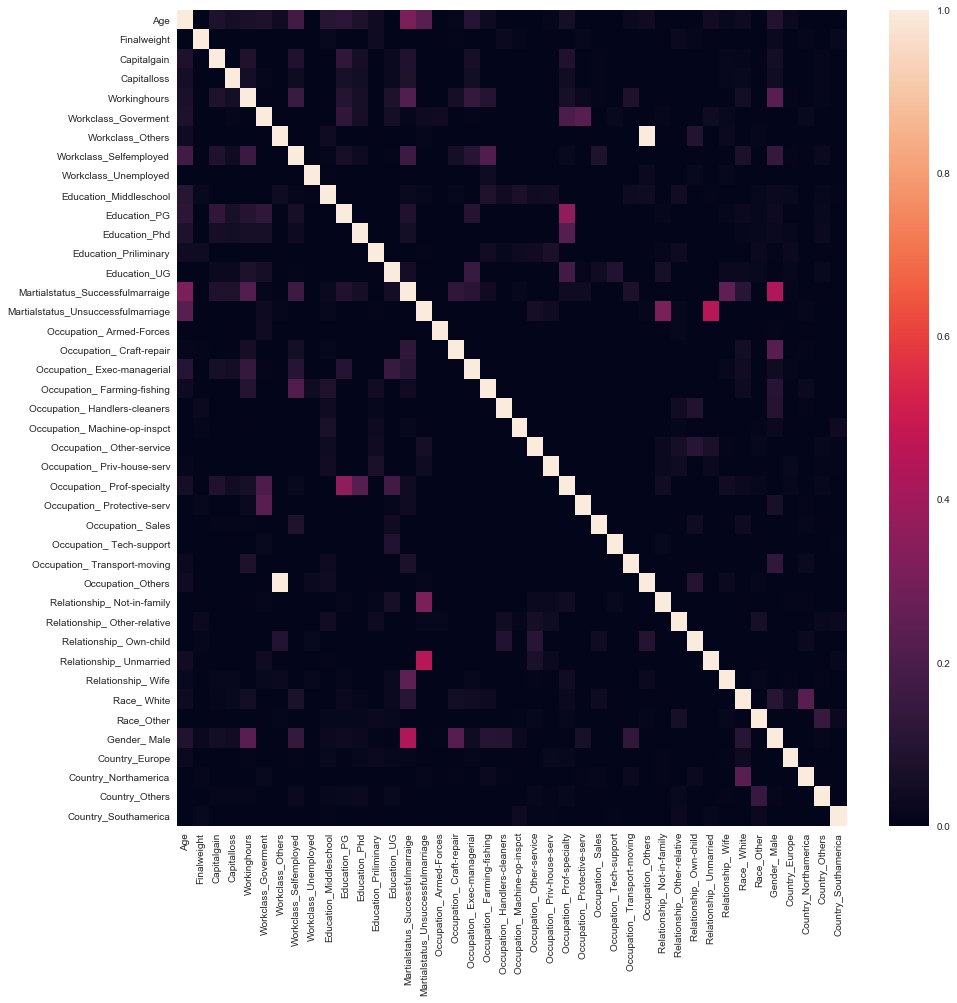

In [124]:
sb.heatmap(x_train.corr(),vmin=0, vmax=1)


In [125]:
cor=x_train.corr()
cor

,Age,Finalweight,Capitalgain,Capitalloss,Workinghours,Workclass_Goverment,Workclass_Others,Workclass_Selfemployed,Workclass_Unemployed,Education_Middleschool,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Race_Other,Gender_ Male,Country_Europe,Country_Northamerica,Country_Others,Country_Southamerica
Age,1.000000,-0.076646,0.077674,0.057775,0.068756,0.076703,0.042627,0.174917,0.000247,0.102913,...,-0.432918,0.043188,0.020854,0.033412,-0.027887,0.088832,0.028225,-0.011935,0.001552,-0.001346
Finalweight,-0.076646,1.000000,0.000432,-0.010252,-0.018768,-0.012042,-0.002923,-0.047369,0.000416,0.022340,...,0.013818,0.004400,-0.016897,-0.056896,-0.067497,0.026858,-0.013515,0.012111,-0.000103,0.022670
Capitalgain,0.077674,0.000432,1.000000,-0.031615,0.078409,-0.013883,-0.015585,0.082878,-0.002588,-0.020584,...,-0.053601,-0.029004,0.017730,0.014429,0.004529,0.048480,-0.006198,-0.008145,0.014378,-0.007734
Capitalloss,0.057775,-0.010252,-0.031615,1.000000,0.054256,0.014764,-0.016102,0.036262,-0.005504,-0.009069,...,-0.050922,-0.039136,0.017138,0.021044,-0.004670,0.045567,-0.005466,-0.008633,0.013286,-0.005045
Workinghours,0.068756,-0.018768,0.078409,0.054256,1.000000,0.001613,-0.168640,0.153432,-0.018829,-0.017541,...,-0.249254,-0.037182,-0.065140,0.049345,-0.008075,0.229309,0.010349,-0.009388,0.013824,-0.012294
Workclass_Goverment,0.076703,-0.012042,-0.013883,0.014764,0.001613,1.000000,-0.096003,-0.139694,-0.009977,-0.040604,...,-0.058565,0.036538,0.022545,-0.054731,0.006388,-0.038313,-0.013394,0.022290,-0.016357,-0.015767
Workclass_Others,0.042627,-0.002923,-0.015585,-0.016102,-0.168640,-0.096003,1.000000,-0.086951,-0.006210,0.036486,...,0.092638,-0.008357,0.027106,-0.022055,0.013221,-0.065556,-0.001461,0.002957,-0.001305,-0.003548
Workclass_Selfemployed,0.174917,-0.047369,0.082878,0.036262,0.153432,-0.139694,-0.086951,1.000000,-0.009036,0.011987,...,-0.096106,-0.057238,-0.002774,0.071102,-0.010312,0.139689,0.008128,-0.013910,0.025162,-0.005089
Workclass_Unemployed,0.000247,0.000416,-0.002588,-0.005504,-0.018829,-0.009977,-0.006210,-0.009036,1.000000,0.009695,...,0.022462,-0.000875,0.016887,-0.003222,-0.000253,-0.000137,-0.003239,0.001437,-0.003662,-0.001651
Education_Middleschool,0.102913,0.022340,-0.020584,-0.009069,-0.017541,-0.040604,0.036486,0.011987,0.009695,1.000000,...,-0.043843,0.008413,-0.011041,-0.002209,0.017581,0.030521,0.020546,-0.024094,0.019184,0.008004


In [126]:
i=0
for val in cor.columns:
    for x in range(0,42):
        if((cor[val].iloc[x]>0.9)&(cor[val].iloc[x]<=0.99)):
            print(val,'has correlation')
            i=1
if(i==0):
    print('There is no correlation greater than 0.9')

There is no correlation greater than 0.9


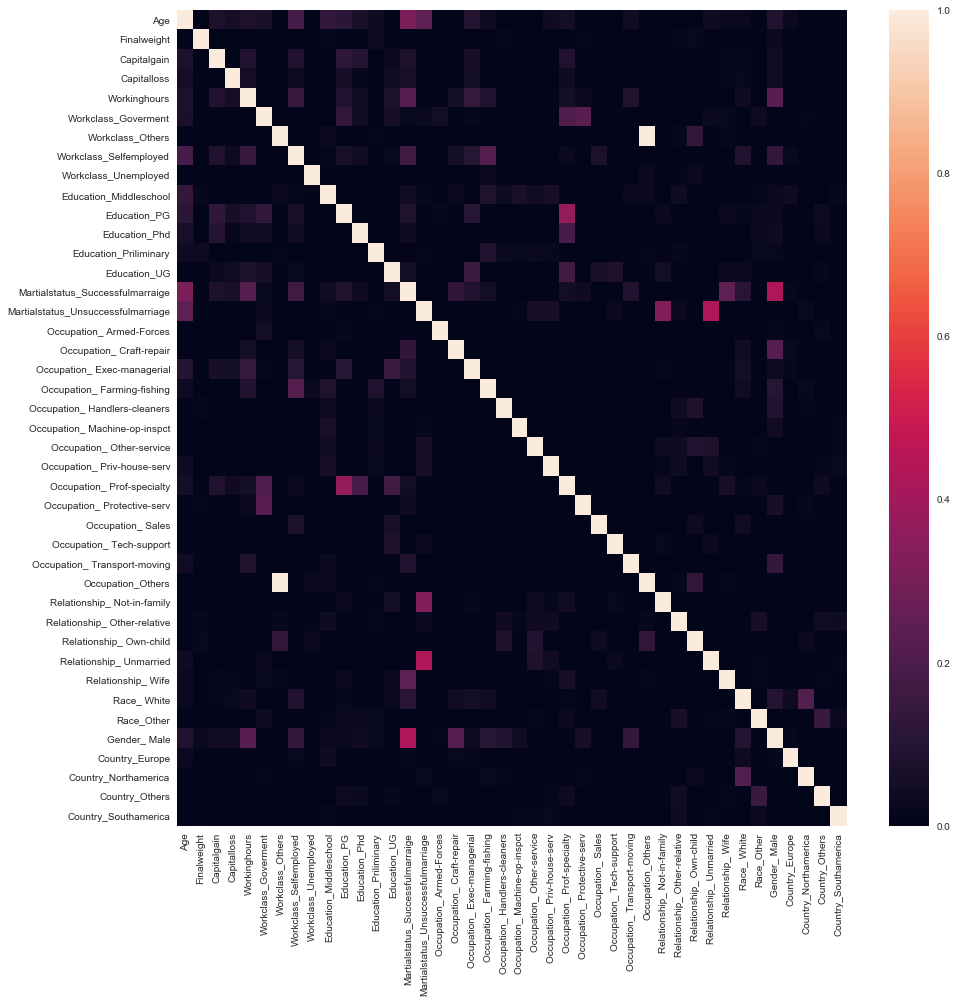

In [127]:
sb.heatmap(x_test.corr(),vmin=0, vmax=1)

In [128]:
cor=x_test.corr()
cor

,Age,Finalweight,Capitalgain,Capitalloss,Workinghours,Workclass_Goverment,Workclass_Others,Workclass_Selfemployed,Workclass_Unemployed,Education_Middleschool,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Race_Other,Gender_ Male,Country_Europe,Country_Northamerica,Country_Others,Country_Southamerica
Age,1.000000,-0.076574,0.076377,0.055302,0.077058,0.068399,-0.003404,0.185422,-1.552855e-03,0.133123,...,-0.433179,0.038740,0.028633,0.029218,-0.029910,0.086773,0.026239,-0.011738,-0.001532,-0.001442
Finalweight,-0.076574,1.000000,-0.011753,0.007386,-0.003155,-0.014227,-0.010878,-0.038130,-5.622249e-03,0.018334,...,0.022513,0.007798,-0.022966,-0.077322,-0.068690,0.029486,-0.010630,0.011623,0.003515,0.010316
Capitalgain,0.076377,-0.011753,1.000000,-0.031109,0.089390,-0.014393,-0.025688,0.083039,-3.536720e-03,-0.015213,...,-0.048998,-0.028598,0.016806,0.015532,0.006336,0.044412,-0.002298,-0.010076,0.009390,-0.008702
Capitalloss,0.055302,0.007386,-0.031109,1.000000,0.054890,0.000464,-0.004452,0.032053,6.199425e-03,-0.015906,...,-0.045643,-0.025777,0.013245,0.019616,-0.005548,0.045312,-0.004508,0.007347,-0.014418,-0.004454
Workinghours,0.077058,-0.003155,0.089390,0.054890,1.000000,0.000531,-0.176487,0.148378,-1.170564e-02,-0.026469,...,-0.256963,-0.029270,-0.069895,0.041172,-0.015673,0.227077,0.005720,-0.001890,0.000606,0.000473
Workclass_Goverment,0.068399,-0.014227,-0.014393,0.000464,0.000531,1.000000,-0.099055,-0.143598,-9.793978e-03,-0.043851,...,-0.051374,0.026789,0.022104,-0.074749,0.034215,-0.038956,-0.012880,0.014184,-0.006212,-0.002575
Workclass_Others,-0.003404,-0.010878,-0.025688,-0.004452,-0.176487,-0.099055,1.000000,-0.091137,-6.215914e-03,0.031110,...,0.130700,-0.013964,0.017086,-0.017745,0.003939,-0.060968,-0.002746,0.003160,0.010920,-0.011899
Workclass_Selfemployed,0.185422,-0.038130,0.083039,0.032053,0.148378,-0.143598,-0.091137,1.000000,-9.011045e-03,0.012829,...,-0.088571,-0.046511,-0.000038,0.082688,-0.024567,0.132591,0.022590,-0.009688,0.011131,-0.011147
Workclass_Unemployed,-0.001553,-0.005622,-0.003537,0.006199,-0.011706,-0.009794,-0.006216,-0.009011,1.000000e+00,0.010238,...,0.023718,-0.008406,-0.005497,0.003071,-0.005539,0.001734,-0.003152,0.006150,-0.003448,-0.001582
Education_Middleschool,0.133123,0.018334,-0.015213,-0.015906,-0.026469,-0.043851,0.031110,0.012829,1.023841e-02,1.000000,...,-0.053861,-0.000019,-0.011503,-0.014887,0.011788,0.030272,0.035472,-0.027639,-0.000543,0.017251


In [129]:
i=0
for val in cor.columns:
    for x in range(0,42):
        if((cor[val].iloc[x]>0.9)&(cor[val].iloc[x]<=0.99)):
            print(val,'has correlation')
            i=1
if(i==0):
    print('There is no correlation greater than 0.9')

There is no correlation greater than 0.9


# Implementation of Logistic Regression

In [130]:
x_train_log=x_train
x_test_log=x_test


In [131]:
x_train_log['Intercept']=1
x_test_log['Intercept']=1
y_train_log=np.ravel(y_train)
y_test_log=np.ravel(y_test)

In [132]:
logreg=LogisticRegression()
logreg.fit(x_train_log,y_train_log)
predicted=logreg.predict(x_test_log)
print('TrainScore:',logreg.score(x_train_log,y_train_log))
print('TestScore:',logreg.score(x_test_log,y_test_log))
print(logreg.intercept_)
print(logreg.coef_)


TrainScore: 0.7977334848438316
TestScore: 0.7997051778146306
[-0.00191126]
[[-4.85168726e-03 -3.72496199e-06  3.37062450e-04  7.76316100e-04
  -1.05416093e-02  2.20643806e-04 -5.13776408e-04  3.87154598e-04
  -9.21712702e-06 -2.98300947e-04  9.69587799e-04  2.71038431e-04
  -6.90554579e-05  9.63660636e-04  3.96526167e-03 -1.92048543e-03
  -1.99490051e-06 -2.55078802e-04  1.19777244e-03 -2.59299524e-04
  -4.31890684e-04 -4.26727486e-04 -1.19438593e-03 -5.93861037e-05
   9.48124868e-04  7.79638800e-05 -7.04804881e-05  4.94401351e-05
  -1.55131278e-04 -5.16605066e-04 -2.30660860e-03 -3.50934267e-04
  -2.15501297e-03 -1.10660161e-03  4.46117279e-04 -1.06193763e-03
  -2.39845931e-04  9.98857190e-04  1.44819174e-05 -1.86231370e-03
  -4.59421141e-05 -3.65720158e-05 -1.91125879e-03]]


In [133]:
log_acc=metrics.accuracy_score(y_test_log,predicted)
print('Accuracy:',log_acc)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test_log,predicted))
prob_pre=logreg.predict_proba(x_test_log)
print('Classification report:')
print(metrics.classification_report(y_test_log,predicted))
log_roc=metrics.roc_auc_score(y_test_log,predicted)
print('ROC value:')
print(log_roc)
print('ROC value:')
print(metrics.roc_auc_score(y_test_log,prob_pre[:, 1]))
print('Cross Validation:')
scores = cross_val_score(LogisticRegression(), x_train_log, y_train_log, scoring='accuracy',cv=10,return_train_score=True)
print(scores)
log_cv=scores['test_score'].mean()
print('Cross_val Mean:',log_cv)


Accuracy: 0.7997051778146306
Confusion Matrix:
[[12019   416]
 [ 2845  1001]]
Classification report:
             precision    recall  f1-score   support

          0       0.81      0.97      0.88     12435
          1       0.71      0.26      0.38      3846

avg / total       0.78      0.80      0.76     16281

ROC value:
0.6134082251106691
ROC value:
0.5750003188708168
Cross Validation:
{'fit_time': array([0.28080058, 0.28080058, 0.20280004, 0.20280051, 0.21840024,
       0.23400068, 0.20280027, 0.23400044, 0.21840048, 0.23400068]), 'score_time': array([0.        , 0.        , 0.0156002 , 0.        , 0.        ,
       0.        , 0.        , 0.01559997, 0.        , 0.        ]), 'test_score': array([0.79613141, 0.79821867, 0.79269042, 0.79330467, 0.79330467,
       0.80558968, 0.79146192, 0.8022113 , 0.79668305, 0.80282555]), 'train_score': array([0.7978433 , 0.7969971 , 0.79737246, 0.79651937, 0.79822556,
       0.79689473, 0.79733834, 0.79747483, 0.79791844, 0.79709947])}
Cross_

# Implementation of Decision Tree Algorithm

In [134]:
dectree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=0)
dectree.fit(x_train,y_train)
predicted=dectree.predict(x_test)
print('Train score:',dectree.score(x_train,y_train))
print('Test score:',dectree.score(x_test,y_test))

Train score: 0.8512023586499187
Test score: 0.8507462686567164


In [135]:
dec_acc=metrics.accuracy_score(y_test,predicted)
print('Accuracy:',dec_acc)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test,predicted))
print('Classification report:')
print(metrics.classification_report(y_test,predicted))
print('ROC value:')
dec_roc=metrics.roc_auc_score(y_test,predicted)
print(dec_roc)
print('Cross Validation:')
scores = cross_val_score(DecisionTreeClassifier(), x_train, y_train, scoring='accuracy',cv=10,return_train_score=True)
print(scores)
dec_cv=scores['test_score'].mean()
print('Cross_val Mean:',dec_cv)

Accuracy: 0.8507462686567164
Confusion Matrix:
[[11552   883]
 [ 1547  2299]]
Classification report:
             precision    recall  f1-score   support

          0       0.88      0.93      0.90     12435
          1       0.72      0.60      0.65      3846

avg / total       0.84      0.85      0.85     16281

ROC value:
0.763377331233177
Cross Validation:
{'fit_time': array([0.40560079, 0.37440062, 0.39000082, 0.37440085, 0.42120051,
       0.39000058, 0.35880065, 0.90480161, 0.74880123, 0.68640113]), 'score_time': array([0.01559997, 0.        , 0.        , 0.01559997, 0.        ,
       0.        , 0.        , 0.01559997, 0.        , 0.        ]), 'test_score': array([0.80810562, 0.81081081, 0.81726044, 0.80958231, 0.80620393,
       0.81081081, 0.80743243, 0.81664619, 0.81449631, 0.81941032]), 'train_score': array([0.99993175, 0.99993175, 0.99993175, 0.99989763, 0.99989763,
       0.99989763, 0.99993175, 0.99989763, 0.99993175, 0.99993175])}
Cross_val Mean: 0.8120759181321049


# Implementation of Random Forest Algorithm

In [136]:
randfor=RandomForestClassifier(max_features=35,max_depth=8,random_state=0)
randfor.fit(x_train,y_train)
predicted=randfor.predict(x_test)
print('Train Score:',randfor.score(x_train,y_train))
print('Test Score:',randfor.score(x_test,y_test))


Train Score: 0.8644083412671602
Test Score: 0.8611264664332657


In [137]:
rf_acc=metrics.accuracy_score(y_test,predicted)
print('Accuracy:',rf_acc)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test,predicted))
print('Classification report:')
print(metrics.classification_report(y_test,predicted))
print('ROC value:')
rf_roc=metrics.roc_auc_score(y_test,predicted)
print(rf_roc)
print('Cross Validation:')
scores = cross_val_score(RandomForestClassifier() , x_train, y_train, scoring='accuracy',cv=10,return_train_score=True)
print(scores)
rf_cv=scores['test_score'].mean()
print('Cross_val Mean:',rf_cv)

Accuracy: 0.8611264664332657
Confusion Matrix:
[[11883   552]
 [ 1709  2137]]
Classification report:
             precision    recall  f1-score   support

          0       0.87      0.96      0.91     12435
          1       0.79      0.56      0.65      3846

avg / total       0.86      0.86      0.85     16281

ROC value:
0.7556256966804608
Cross Validation:
{'fit_time': array([0.76440144, 1.23240209, 1.40400267, 1.12320161, 0.96720195,
       1.21680212, 1.21680188, 1.13880181, 1.41960239, 1.18560195]), 'score_time': array([0.01559997, 0.03120017, 0.03119993, 0.03120017, 0.03119993,
       0.04680014, 0.03120041, 0.03120017, 0.03119993, 0.03120041]), 'test_score': array([0.83328216, 0.84551597, 0.84428747, 0.83722359, 0.8519656 ,
       0.83968059, 0.84551597, 0.8531941 , 0.84981572, 0.84551597]), 'train_score': array([0.98689599, 0.98744242, 0.98669169, 0.98723767, 0.98723767,
       0.98617983, 0.98631633, 0.98723767, 0.98764716, 0.98720355])}
Cross_val Mean: 0.84459971492133


# Implementation of KNN Algorithm

In [138]:
knn=KNeighborsClassifier(n_neighbors = 7, weights='uniform', algorithm='auto')
knn.fit(x_test,y_test)
predicted=knn.predict(x_test)
print('Train value:',knn.score(x_train,y_train))
print('Test value:',knn.score(x_test,y_test))

Train value: 0.7826848069776727
Test value: 0.8166574534733738


In [139]:
knn_acc=metrics.accuracy_score(y_test,predicted)
print('Accuracy:',knn_acc)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test,predicted))
print('Classification report:')
print(metrics.classification_report(y_test,predicted))
print('ROC value:')
knn_roc=metrics.roc_auc_score(y_test,predicted)
print(knn_roc)
print('Cross Validation:')
scores = cross_val_score(KNeighborsClassifier(), x_train, y_train, scoring='accuracy',cv=10,return_train_score=True)
print(scores)
knn_cv=scores['test_score'].mean()
print('Cross_val Mean:',knn_cv)

Accuracy: 0.8166574534733738
Confusion Matrix:
[[12068   367]
 [ 2618  1228]]
Classification report:
             precision    recall  f1-score   support

          0       0.82      0.97      0.89     12435
          1       0.77      0.32      0.45      3846

avg / total       0.81      0.82      0.79     16281

ROC value:
0.6448896508333192
Cross Validation:
{'fit_time': array([1.59120274, 1.66920304, 1.43520236, 1.79400325, 1.76280308,
       1.79400325, 1.80960321, 1.70040298, 1.71600294, 1.54440284]), 'score_time': array([0.45240092, 0.56160069, 0.49920106, 0.51480079, 0.42120075,
       0.49920058, 0.45240045, 0.53040075, 0.48360085, 0.56160092]), 'test_score': array([0.77064784, 0.7791769 , 0.78009828, 0.77764128, 0.77733415,
       0.77948403, 0.77334152, 0.7779484 , 0.7718059 , 0.77579853]), 'train_score': array([0.83585859, 0.83562532, 0.83477222, 0.83313428, 0.83453336,
       0.83299778, 0.83463573, 0.83429449, 0.83466985, 0.83439686])}
Cross_val Mean: 0.776327682806037


# Implementation of Naive Bayes Algorithm

In [140]:
nb=GaussianNB()
nb.fit(x_train,y_train)
predicted=nb.predict(x_test)
print('Train Value:',nb.score(x_train,y_train))
print('Test Value:',nb.score(x_test,y_test))

Train Value: 0.7948773072080095
Test Value: 0.7954056876113261


In [141]:
nb_acc=metrics.accuracy_score(y_test,predicted)
print('Accuracy:',nb_acc)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test,predicted))
print('Classification report:')
print(metrics.classification_report(y_test,predicted))
print('ROC value:')
nb_roc=metrics.roc_auc_score(y_test,predicted)
print(nb_roc)
print('Cross Validation:')
scores = cross_val_score(GaussianNB(), x_train, y_train, scoring='accuracy',cv=10,return_train_score=True)
print(scores)
nb_cv=scores['test_score'].mean()
print('Cross_val Mean:',nb_cv)

Accuracy: 0.7954056876113261
Confusion Matrix:
[[11776   659]
 [ 2672  1174]]
Classification report:
             precision    recall  f1-score   support

          0       0.82      0.95      0.88     12435
          1       0.64      0.31      0.41      3846

avg / total       0.77      0.80      0.77     16281

ROC value:
0.6261283165440007
Cross Validation:
{'fit_time': array([0.18720031, 0.14040017, 0.12480021, 0.17160034, 0.12480021,
       0.12479997, 0.10920024, 0.12480044, 0.18720031, 0.15600038]), 'score_time': array([0.03119993, 0.01559997, 0.03120017, 0.01559973, 0.0156002 ,
       0.01559997, 0.01559997, 0.03119993, 0.03120017, 0.01559997]), 'test_score': array([0.79183298, 0.79576167, 0.78961916, 0.79330467, 0.79514742,
       0.8022113 , 0.78470516, 0.79791155, 0.79453317, 0.80374693]), 'train_score': array([0.79521567, 0.79392595, 0.79529091, 0.79532503, 0.79481317,
       0.79409657, 0.79566627, 0.79501792, 0.79546153, 0.79454018])}
Cross_val Mean: 0.794877400707152


# Implementation of Gradient Boosting classifier Algorithm

In [142]:
gbc=GradientBoostingClassifier(n_estimators=200)
gbc.fit(x_train,y_train)
predicted=gbc.predict(x_test)
print('Train value:',gbc.score(x_train,y_train))
print('Test value:',gbc.score(x_test,y_test))

Train value: 0.8735911059242653
Test value: 0.8707696087463915


In [143]:
gb_acc=metrics.accuracy_score(y_test,predicted)
print('Accuracy:',gb_acc)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test,predicted))
print('Classification report:')
print(metrics.classification_report(y_test,predicted))
print('ROC value:')
gb_roc=metrics.roc_auc_score(y_test,predicted)
print(gb_roc)
print('Cross Validation:')
scores = cross_val_score(DecisionTreeClassifier(), x_train, y_train, scoring='accuracy',cv=10,return_train_score=True)
print(scores)
gb_cv=scores['test_score'].mean()
print('Cross_val Mean:',gb_cv)

Accuracy: 0.8707696087463915
Confusion Matrix:
[[11758   677]
 [ 1427  2419]]
Classification report:
             precision    recall  f1-score   support

          0       0.89      0.95      0.92     12435
          1       0.78      0.63      0.70      3846

avg / total       0.87      0.87      0.87     16281

ROC value:
0.7872610272324042
Cross Validation:
{'fit_time': array([0.74880123, 0.67080116, 0.63960123, 0.57720113, 0.57720089,
       0.57720089, 0.46800113, 0.46800089, 0.42120075, 0.85800147]), 'score_time': array([0.        , 0.01559997, 0.01559997, 0.        , 0.        ,
       0.0156002 , 0.        , 0.        , 0.0156002 , 0.        ]), 'test_score': array([0.80350015, 0.81081081, 0.81726044, 0.81296069, 0.80251843,
       0.80743243, 0.80866093, 0.81418919, 0.81234644, 0.82309582]), 'train_score': array([0.99993175, 0.99993175, 0.99993175, 0.99989763, 0.99989763,
       0.99989763, 0.99993175, 0.99989763, 0.99993175, 0.99993175])}
Cross_val Mean: 0.8112775337790689


# Implementation of SGDC Classifier Algorithm

In [144]:
import warnings
warnings.filterwarnings("ignore")
sgdc=SGDClassifier(shuffle=False)
sgdc.fit(x_train,y_train)
predicted=sgdc.predict(x_test)
print('Train value:',sgdc.score(x_train,y_train))
print('Test value:',sgdc.score(x_test,y_test))

Train value: 0.7815791898283222
Test value: 0.7828757447331245


In [145]:
sg_acc=metrics.accuracy_score(y_test,predicted)
print('Accuracy:',sg_acc)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test,predicted))
print('Classification report:')
print(metrics.classification_report(y_test,predicted))
print('ROC value:')
sg_roc=metrics.roc_auc_score(y_test,predicted)
print(sg_roc)
print('Cross Validation:')
scores = cross_val_score(DecisionTreeClassifier(), x_train, y_train, scoring='accuracy',cv=10,return_train_score=True)
print(scores)
sg_cv=scores['test_score'].mean()
print('Cross_val Mean:',sg_cv)

Accuracy: 0.7828757447331245
Confusion Matrix:
[[11568   867]
 [ 2668  1178]]
Classification report:
             precision    recall  f1-score   support

          0       0.81      0.93      0.87     12435
          1       0.58      0.31      0.40      3846

avg / total       0.76      0.78      0.76     16281

ROC value:
0.6182848471960593
Cross Validation:
{'fit_time': array([0.74880123, 0.8892014 , 0.7800014 , 0.70200109, 0.74880123,
       0.92040157, 0.81120157, 0.81120133, 0.84240174, 0.71760154]), 'score_time': array([0.0156002 , 0.        , 0.01559997, 0.0156002 , 0.        ,
       0.        , 0.01559997, 0.0156002 , 0.01559973, 0.        ]), 'test_score': array([0.80350015, 0.81511057, 0.81572482, 0.81418919, 0.80251843,
       0.80804668, 0.80743243, 0.81879607, 0.81326781, 0.82094595]), 'train_score': array([0.99993175, 0.99993175, 0.99993175, 0.99989763, 0.99989763,
       0.99989763, 0.99993175, 0.99989763, 0.99993175, 0.99993175])}
Cross_val Mean: 0.8119532094547445


# Implementation of LinearSVC Algorithm

In [146]:
sv=LinearSVC(random_state=0,tol=1e-5)
sv.fit(x_train,y_train)
predicted=sv.predict(x_test)
print('Train value:',sv.score(x_train,y_train))
print('Test value:',sv.score(x_test,y_test))

Train value: 0.7654248948128128
Test value: 0.7702229592776857


In [147]:
sv_acc=metrics.accuracy_score(y_test,predicted)
print('Accuracy:',sv_acc)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test,predicted))
print('Classification report:')
cr=metrics.classification_report(y_test,predicted)
print(cr)
print('ROC value:')
sv_roc=metrics.roc_auc_score(y_test,predicted)
print(sv_roc)
print('Cross Validation:')
scores = cross_val_score(DecisionTreeClassifier(), x_train, y_train, scoring='accuracy',cv=10,return_train_score=True)
print(scores)
sv_cv=scores['test_score'].mean()
print('Cross_val Mean:',sv_cv)


Accuracy: 0.7702229592776857
Confusion Matrix:
[[12435     0]
 [ 3741   105]]
Classification report:
             precision    recall  f1-score   support

          0       0.77      1.00      0.87     12435
          1       1.00      0.03      0.05      3846

avg / total       0.82      0.77      0.68     16281

ROC value:
0.5136505460218409
Cross Validation:
{'fit_time': array([0.82680154, 0.85800147, 0.71760106, 0.70200109, 0.67080116,
       0.56160116, 0.65520096, 0.82680178, 0.85800147, 0.74880123]), 'score_time': array([0.        , 0.        , 0.01559997, 0.0156002 , 0.0156002 ,
       0.0156002 , 0.01559997, 0.        , 0.        , 0.01559997]), 'test_score': array([0.80503531, 0.81388206, 0.81787469, 0.81265356, 0.80773956,
       0.80773956, 0.80497543, 0.81879607, 0.81111794, 0.82002457]), 'train_score': array([0.99993175, 0.99993175, 0.99993175, 0.99989763, 0.99989763,
       0.99989763, 0.99993175, 0.99989763, 0.99993175, 0.99993175])}
Cross_val Mean: 0.8119838748369606


# Comparing the accuracy of different algorithms 

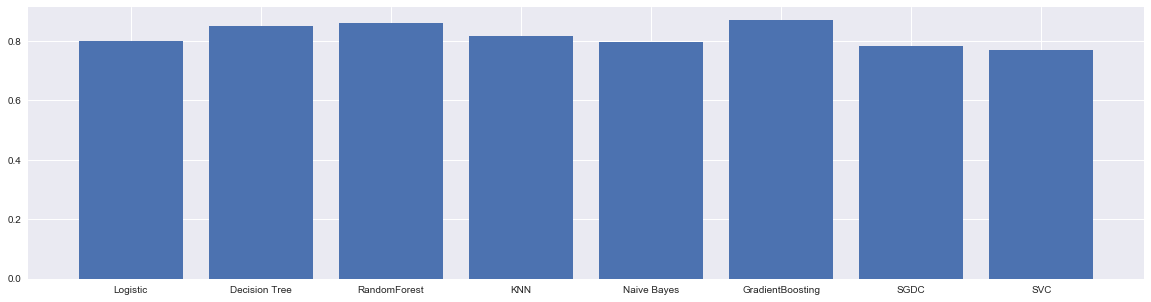

In [148]:
acc={'Logistic':log_acc,'Decision Tree':dec_acc,'RandomForest':rf_acc,'KNN':knn_acc,'Naive Bayes':nb_acc,'GradientBoosting':gb_acc,'SGDC':sg_acc,'SVC':sv_acc}
report={'Accuracy':[log_acc,dec_acc,rf_acc,knn_acc,nb_acc,gb_acc,sg_acc,sv_acc],'ROC':[log_roc,dec_roc,rf_roc,knn_roc,nb_roc,gb_roc,sg_roc,sv_roc],'Cross validation':[log_cv,dec_cv,rf_cv,knn_cv,nb_cv,gb_cv,sg_cv,sv_cv]}
x=list(acc.keys())
y=list(acc.values())
plt.figure(figsize=(20,5))
plt.bar(range(len(acc)),y,tick_label=x)
plt.show()
    

# Comparing the accuracy,cross validation and ROC of different algorithms 

In [149]:
rep=pd.DataFrame.from_dict(report)
index=['Logistic Regression','Decision Tree','Random Forest','KNN','Naive Bayes','Gradient boosting','SGDC','SVC']
rep.index = index
rep

,Accuracy,Cross validation,ROC
Logistic Regression,0.799705,0.797242,0.613408
Decision Tree,0.850746,0.812076,0.763377
Random Forest,0.861126,0.844600,0.755626
KNN,0.816657,0.776328,0.644890
Naive Bayes,0.795406,0.794877,0.626128
Gradient boosting,0.870770,0.811278,0.787261
SGDC,0.782876,0.811953,0.618285
SVC,0.770223,0.811984,0.513651


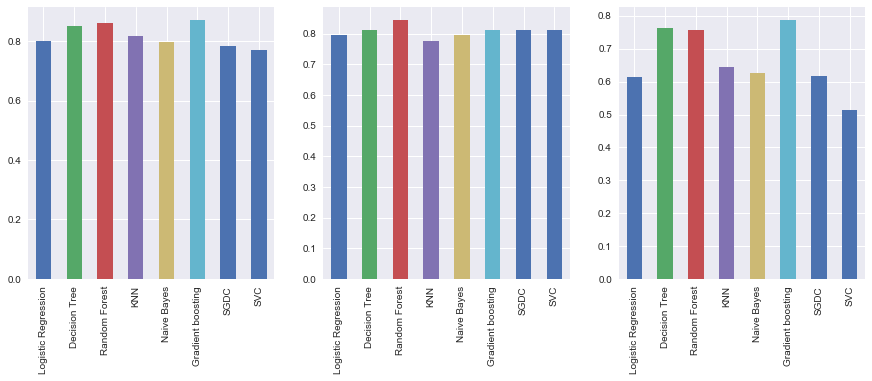

In [150]:
i=1
col=['Accuracy','Cross validation','ROC']
for val in col:
    plt.subplot(1,3,i)
    rep[val].plot(kind='bar',figsize=(15,5))
    i=i+1